# In this code we will perform Exploratory Data Analysis

In [85]:
# Importing core libraries to permform EDA

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the DataFrame and then performing some basic explorative operations

In [94]:
df = pd.read_csv("../artifacts/abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df.shape

(4177, 9)

In [7]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [9]:
print(f"The column 'Sex' is a Categorical variable and has {df.Sex.nunique()} unique values that are {df.Sex.unique()}")

The column 'Sex' is a Categorical variable and has 3 unique values that are ['M' 'F' 'I']


In [47]:
# Let's now split the categorical and numerical data
numerical_columns = df.columns[df.dtypes != 'object']
categorical_columns = df.columns[df.dtypes == 'object']

# Another possibility is the following one
numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

# We now have the basic information of the dataset
 - No NaN
 - Mainly float types except for the number of rings that is an int type and the Sex columns which is a categorical variable with only 3 distinct values
 
### We will now dig depper into the analysis by performing some visualizations.

# Let's now see how each value is correlated with each other

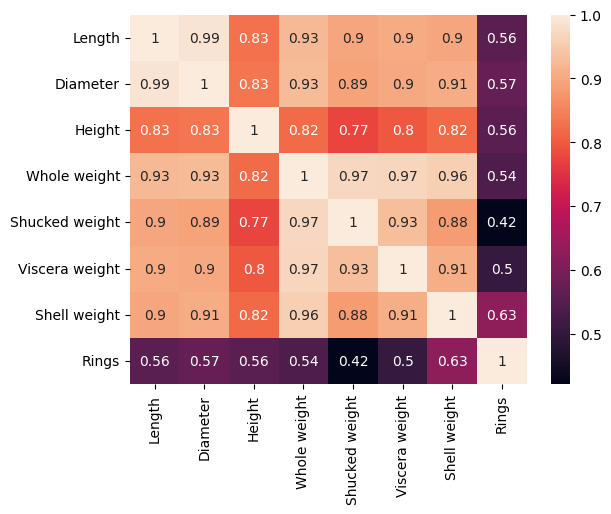

In [60]:
sns.heatmap(df[numerical_columns].corr(),annot = True)
plt.show()

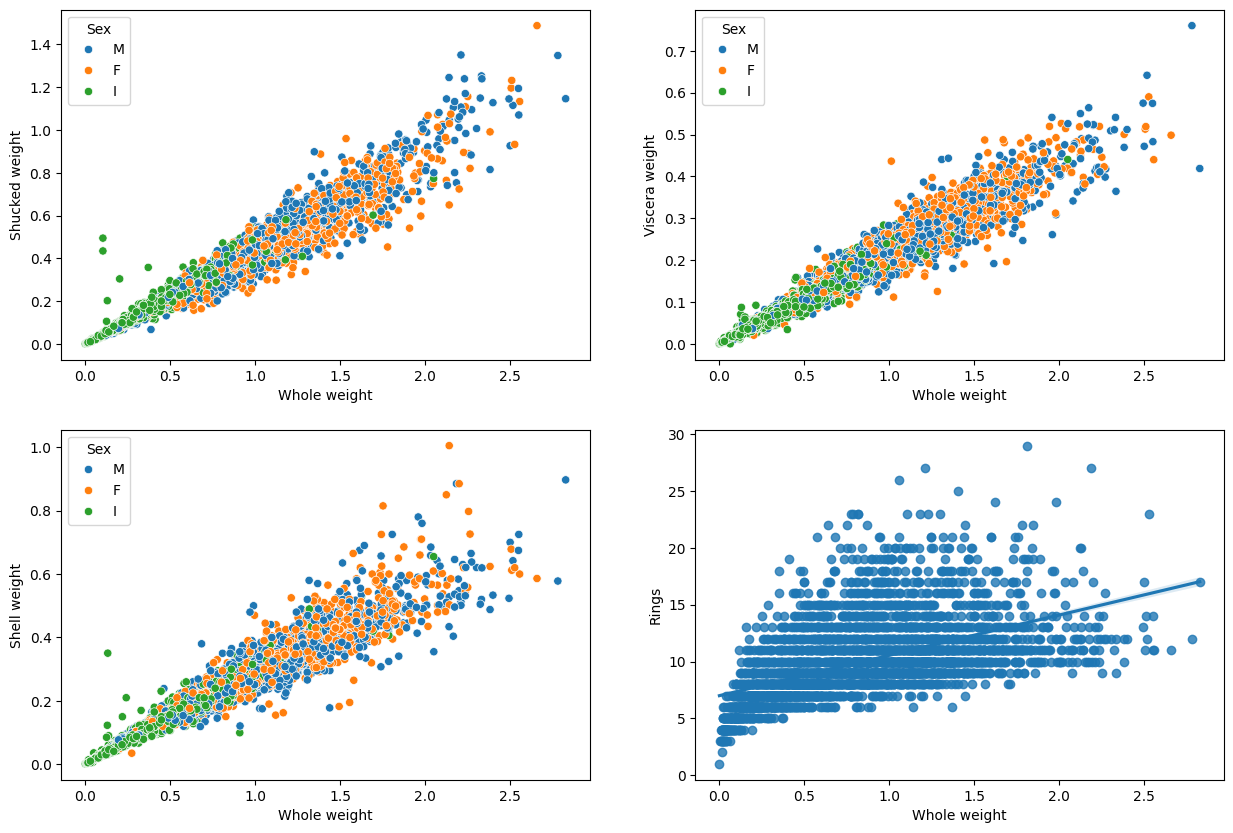

In [62]:
plt.figure(figsize=(15,10))   
plt.subplot(2,2,1)
sns.scatterplot(x = 'Whole weight',y = 'Shucked weight',hue = 'Sex', data=df)
plt.subplot(2,2,2)
sns.scatterplot(x = 'Whole weight',y = 'Viscera weight',hue = 'Sex', data=df)
plt.subplot(2,2,3)
sns.scatterplot(x = 'Whole weight',y = 'Shell weight',hue = 'Sex', data=df)
plt.subplot(2,2,4)
sns.regplot(x = 'Whole weight',y = 'Rings', data=df)
plt.show()

# From the correlation matrix it was clear that the weights are correlated with each other and this has also been confirmed by the subplots. However the number of rings as function of the weight has a lot of dispersion.

<Axes: xlabel='Rings', ylabel='Count'>

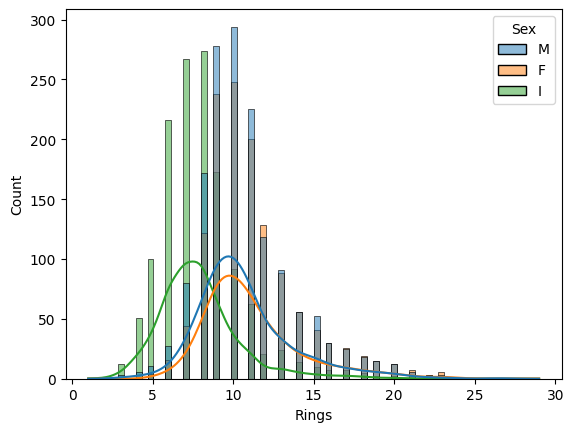

In [67]:
sns.histplot(data=df, x='Rings', kde = True, hue='Sex')

# The sex, Male or Female, present the same distribution with very little difference. On the other hand, as one could've expect, the Infant present the same distribution but with less rings.

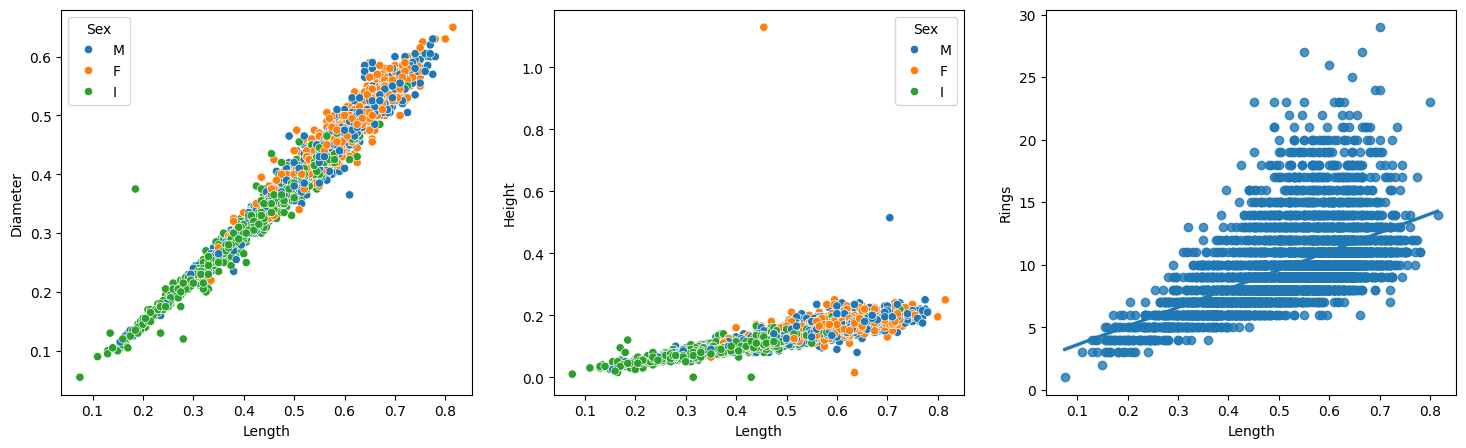

In [72]:
plt.figure(figsize=(18,5))   
plt.subplot(1,3,1)
sns.scatterplot(x = 'Length',y = 'Diameter',hue = 'Sex', data=df)
plt.subplot(1,3,2)
sns.scatterplot(x = 'Length',y = 'Height',hue = 'Sex', data=df)
plt.subplot(1,3,3)
sns.regplot(x = 'Length',y = 'Rings', data=df)
plt.show()

# The dimensions of the abalone present a correlation within each other, which is confirmed by these subplots. On average these dimension present a slight better correlation with the number of rings.

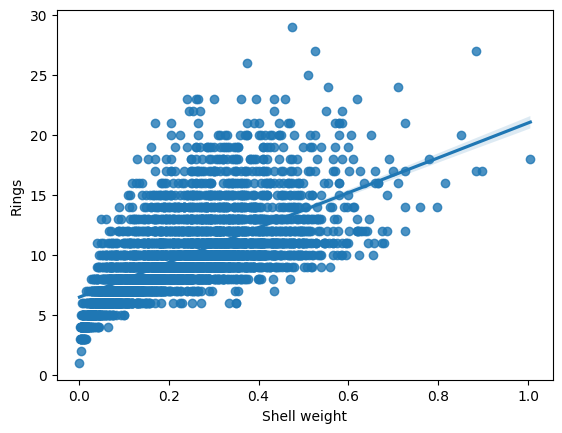

In [74]:
sns.regplot(data=df,x='Shell weight',y='Rings')
plt.show()

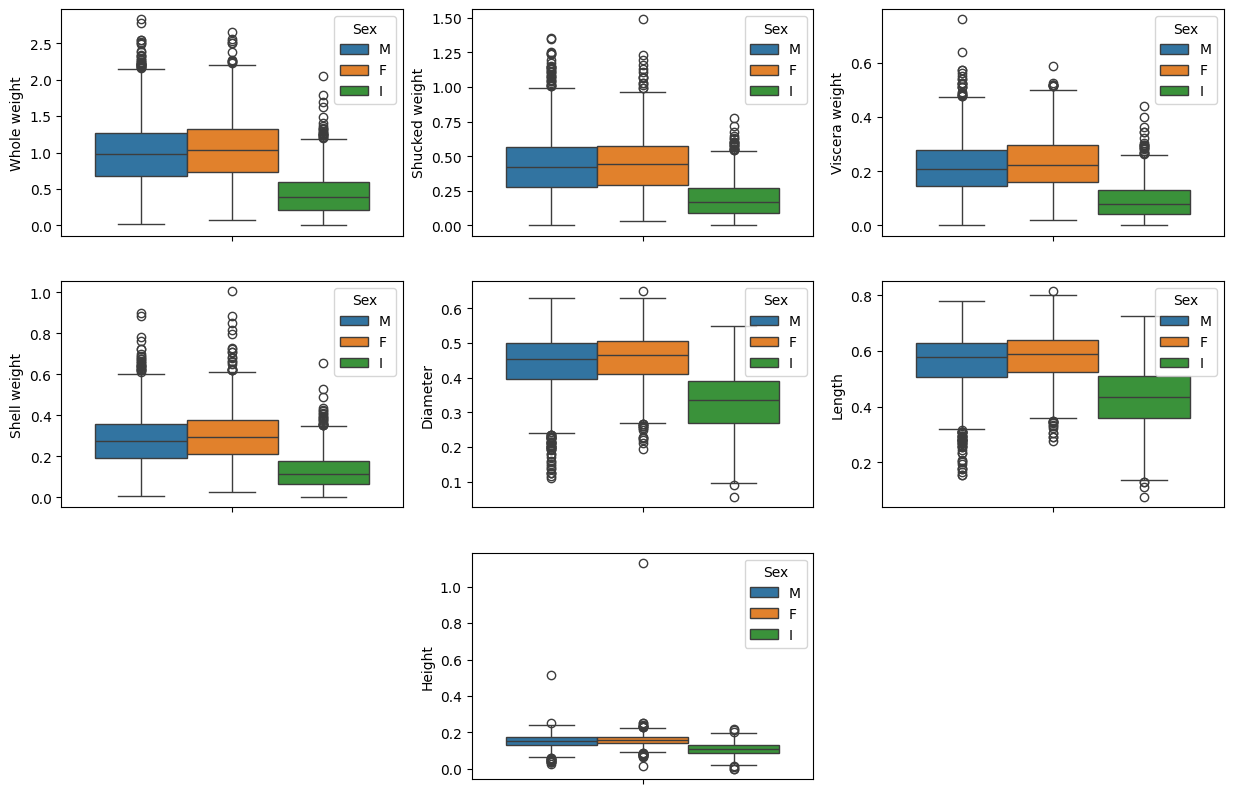

In [81]:
plt.figure(figsize=(15,10))   
plt.subplot(3,3,1)
sns.boxplot(y = 'Whole weight',hue = 'Sex', data=df)
plt.subplot(3,3,2)
sns.boxplot(y = 'Shucked weight',hue = 'Sex', data=df)
plt.subplot(3,3,3)
sns.boxplot(y = 'Viscera weight',hue = 'Sex', data=df)
plt.subplot(3,3,4)
sns.boxplot(y = 'Shell weight',hue = 'Sex', data=df)
plt.subplot(3,3,5)
sns.boxplot(y = 'Diameter',hue = 'Sex', data=df)
plt.subplot(3,3,6)
sns.boxplot(y = 'Length',hue = 'Sex', data=df)
plt.subplot(3,3,8)
sns.boxplot(y= 'Height', hue = 'Sex',data=df)
plt.show()

# We can clearly see some slight outliers that we will correct, Height is the column presenting the more clear outliers

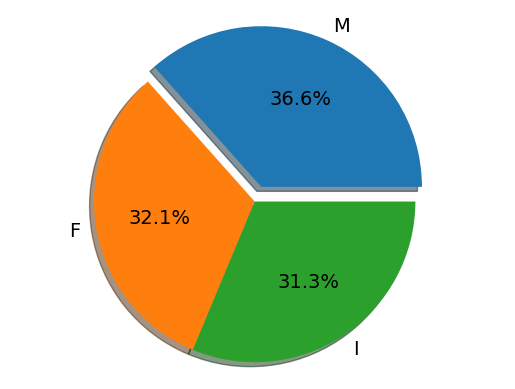

In [114]:
patches, texts, autotexts  = plt.pie(x = df.Sex.value_counts().to_list(),autopct='%1.1f%%',labels=df.Sex.unique(), explode=(0.1,0,0),shadow=True)

for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)
plt.axis('equal')
plt.show()

# We have a majority of male abalones even if the dataframe is pretty uniformely distributed.

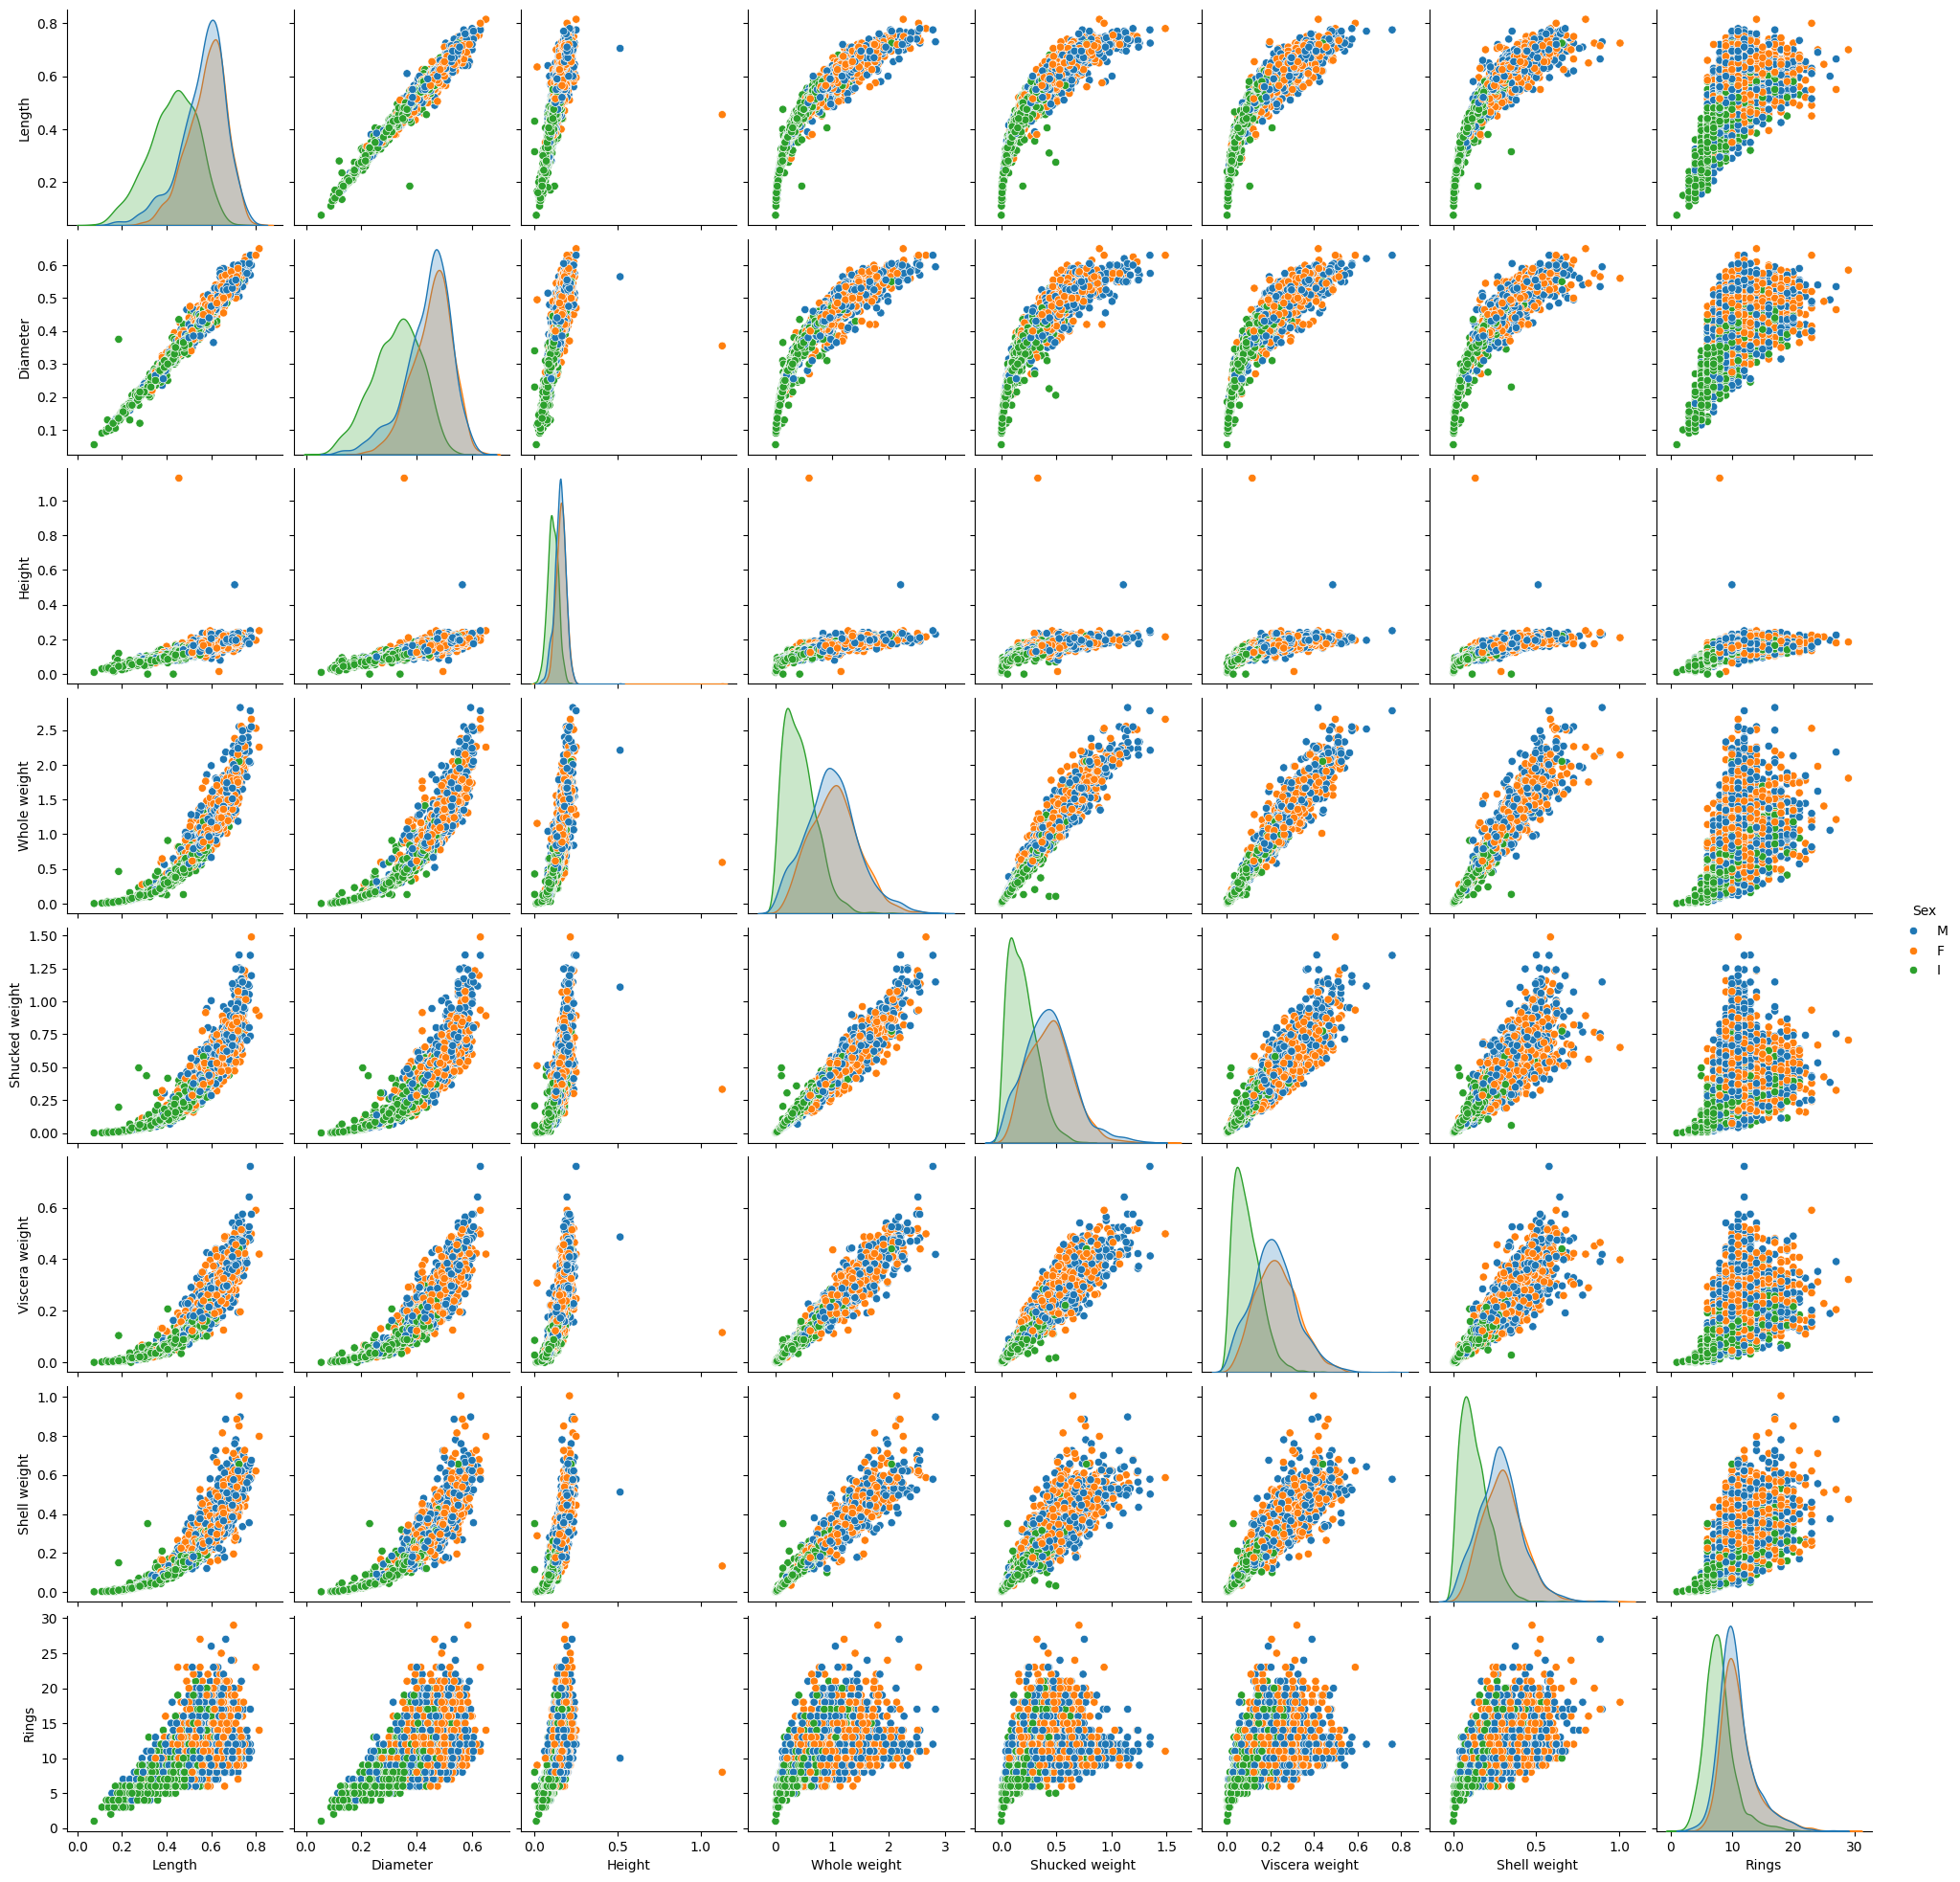

In [119]:
sns.pairplot(data=df,hue='Sex')
plt.show()

# The EDA is terminated, we cannot see much more 